In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
def isfloat(num):
    if num == "nan":
        return False
    try:
        float(num)
        return True
    except ValueError:
        return False


def convertToNumber(strVal):
    lowerStrVal = str(strVal).lower()
#     print("original value", lowerStrVal)
    if lowerStrVal.endswith("/week"):
        return int(float(strVal[0:len(strVal)-5]) * 52 + float(strVal[0:len(strVal)-5]) / 7)
    elif lowerStrVal.endswith("-115k"):
        return int(strVal[0:len(strVal)-5])
    elif lowerStrVal.endswith("k"):
        return int(float(strVal[0:len(strVal)-1]) * 1000)
    elif lowerStrVal.endswith("/h"):
        return int(float(strVal[0:len(strVal)-2])* 8 * 22 * 12)
    elif lowerStrVal.endswith("/month"):
        return int(float(strVal[0:len(strVal)-6]) * 12)
    elif lowerStrVal.endswith("/year"):
        return int(strVal[0:len(strVal)-5])
    elif isfloat(lowerStrVal):
        return int(float(lowerStrVal))
    else:
        return 0
    
def standardizeString(val):
    strVal = str(val)
    return strVal.title()

def capitalString(val):
    strVal = str(val)
    return strVal.upper()

def convertCadToUsd(cadVal):
    usdVal = int(cadVal * 0.78)
    return usdVal


In [247]:
# read csv file
csv_data_path = "./salary_infomation.csv"
salary = pd.read_csv(csv_data_path)

salary

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160k,300k,0,40k,full,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154k,181k,15%,15k,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160k,187500,15%,16k,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236K,750k,0,70k,full,IC & L4,MS,False,4y,NaN
4,FaceBook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168k,330k,10%,75k,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170k,275k,25.5k,50k,full,L4,PHD,True,0y,Return Offer
309,google,2021 4th quarter,Software Engineer,Bay Area,155k,140k,15%,0,full,L4,PHD,True,1y,Return Offer
310,Workday,2021 4th quarter,Software Engineer,Canada,73.3k,60k,10%,12.5k,full,associate,BS,True,1y,Return Offer
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155k,365k,0,36.5k,full,L5,PHD,True,0y,Return Offer


In [248]:
# Data Cleaning 1

salaryInfo = salary

for index, row in salaryInfo.iterrows():
    #print(row)
    salaryInfo.at[index, 'Company'] = standardizeString(row['Company'])
    salaryInfo.at[index, 'Job'] = standardizeString(row['Job'])
    salaryInfo.at[index, 'Area'] = standardizeString(row['Area'])
    salaryInfo.at[index, 'Education'] = capitalString(row['Education'])

    baseVal = convertToNumber(row['Base'])
    equityVal = convertToNumber(row['Equity'])
    signOnVal = convertToNumber(row['Sign-on'])

    if row["Area"] == "Canada":
        baseVal = convertCadToUsd(baseVal)
        equityVal = convertCadToUsd(equityVal)
        signOnVal = convertCadToUsd(signOnVal)

    salaryInfo.at[index, 'Base'] = baseVal
    salaryInfo.at[index, 'Equity'] = equityVal
    salaryInfo.at[index, 'Sign-on'] = signOnVal
    
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,300000,0,40000,full,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,181000,15%,15000,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,187500,15%,16000,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,750000,0,70000,full,IC & L4,MS,False,4y,NaN
4,Facebook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168000,330000,10%,75000,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170000,275000,25.5k,50000,full,L4,PHD,True,0y,Return Offer
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,140000,15%,0,full,L4,PHD,True,1y,Return Offer
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,46800,10%,9750,full,associate,BS,True,1y,Return Offer
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155000,365000,0,36500,full,L5,PHD,True,0y,Return Offer


In [249]:
# Data Cleaning 2
# Apply bonus

def f(row):
    bonus = row["Bonus"]

    if isfloat(bonus):
        return 0
    if bonus == "0":
        bonus = 0
    elif bonus.endswith('k'):
        kb = bonus.split("k")
        #print(kb)
        bonus = int(float(kb[0]) * 1000)
    elif bonus.endswith("%"):
        base = int(row["Base"])
        if len(bonus) > 2:
            pb = bonus.split("-")
            #print(pb)
            b = int(pb[0][:2])
        else:
            b = int(bonus[0])
        bonus = base * b // 100
    else:
        bonus = 0
    
    return bonus

salaryInfo["Bonus"] = salaryInfo.apply(f, axis=1)
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,300000,0,40000,full,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,181000,23100,15000,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,187500,24000,16000,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,750000,0,70000,full,IC & L4,MS,False,4y,NaN
4,Facebook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168000,330000,16800,75000,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170000,275000,25500,50000,full,L4,PHD,True,0y,Return Offer
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,140000,23250,0,full,L4,PHD,True,1y,Return Offer
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,46800,5717,9750,full,associate,BS,True,1y,Return Offer
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155000,365000,0,36500,full,L5,PHD,True,0y,Return Offer


In [250]:
# Data Cleaning 3 
# apply equity // 3.5
def e(row):
    equity = row["Equity"]
    equity = equity // 3.5
    return equity

salaryInfo["Equity"] = salaryInfo.apply(e, axis=1)
salaryInfo

300000
181000
187500
750000
330000
420000
348000
247000
499000
70200
534000
0
140000
366400
255000
0
365000
145000
682100
320000
700000
100000
480000
80000
800000
0
300000
275100
586500
177000
100000
96720
234000
70000
12000
0
230000
436800
175000
150000
100000
52000
300000
16000
100000
700000
200000
575000
637000
650000
148200
330000
40000
330000
280000
330000
260000
130000
8000
120000
250000
300000
360000
637000
410000
280000
160000
0
178200
28000
100000
0
100000
150000
0
700000
450000
128700
350000
695000
200000
420000
175000
443125
67080
75000
200000
140000
50000
0
0
255000
0
0
0
400000
0
780000
80000
400000
200000
225000
400000
270000
340000
350000
0
291000
271600
7000
120000
320000
50000
130000
350000
236000
804000
500000
320000
290000
120000
80000
160000
245000
175500
556000
146000
500000
667000
500000
515000
130000
500000
160000
175000
800000
0
0
0
360000
86580
35000
347000
255000
0
331500
60000
436800
0
270000
300000
140000
0
90000
31200
300000
10000
450000
90000
75000
0
70200

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,85714.0,0,40000,full,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,51714.0,23100,15000,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,53571.0,24000,16000,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,214285.0,0,70000,full,IC & L4,MS,False,4y,NaN
4,Facebook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168000,94285.0,16800,75000,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170000,78571.0,25500,50000,full,L4,PHD,True,0y,Return Offer
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,40000.0,23250,0,full,L4,PHD,True,1y,Return Offer
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,13371.0,5717,9750,full,associate,BS,True,1y,Return Offer
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155000,104285.0,0,36500,full,L5,PHD,True,0y,Return Offer


In [251]:
# Data Cleaning 4
# Creating a new column named Total

def getPackage(row):
    package = 0
    base = row['Base']
    bonus = row['Bonus']
    equity = row['Equity']
    sign = row['Sign-on']
    package += base + bonus + equity + sign
    return package

salaryInfo["Total"] = salaryInfo.apply(getPackage, axis=1)
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return,Total
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,85714.0,0,40000,full,IC & IC3,MS,False,2.5 y,NaN,285714.0
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,51714.0,23100,15000,full,IC& SDE II,MS,False,3y,NaN,243814.0
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,53571.0,24000,16000,full,IC &DS II,MS,False,1.3y,NaN,253571.0
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,214285.0,0,70000,full,IC & L4,MS,False,4y,NaN,520285.0
4,Facebook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168000,94285.0,16800,75000,full,IC& E4,PHD,True,0y,NaN,354085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170000,78571.0,25500,50000,full,L4,PHD,True,0y,Return Offer,324071.0
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,40000.0,23250,0,full,L4,PHD,True,1y,Return Offer,218250.0
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,13371.0,5717,9750,full,associate,BS,True,1y,Return Offer,86012.0
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155000,104285.0,0,36500,full,L5,PHD,True,0y,Return Offer,295785.0


In [252]:
# What jobs are included?

salaryInfo['Job'].unique()

#Machine Learning Engineering and Machine Learning Eng are same. 

array(['Software Engineer', 'Data Science',
       'Machine Learning Engineering', 'Front End Engineer',
       'Hardware Engineer', 'Engineering Manager', 'Machine Learning Eng'],
      dtype=object)

In [253]:
# Data Cleaning 5
# Merge Machine Learning Engineering and Machine Learning Eng

def jobMerge(row):
    job = row["Job"]
    if job.endswith("Engineering") or job.endswith("Eng"):
        job = "Machine Learning Engineer"

    return job

salaryInfo["Job"] = salaryInfo.apply(jobMerge, axis=1)
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return,Total
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,85714.0,0,40000,full,IC & IC3,MS,False,2.5 y,NaN,285714.0
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,51714.0,23100,15000,full,IC& SDE II,MS,False,3y,NaN,243814.0
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,53571.0,24000,16000,full,IC &DS II,MS,False,1.3y,NaN,253571.0
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,214285.0,0,70000,full,IC & L4,MS,False,4y,NaN,520285.0
4,Facebook,2021 4th quarter,Machine Learning Engineer,Great Seattle Area,168000,94285.0,16800,75000,full,IC& E4,PHD,True,0y,NaN,354085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Engineer,Bay Area,170000,78571.0,25500,50000,full,L4,PHD,True,0y,Return Offer,324071.0
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,40000.0,23250,0,full,L4,PHD,True,1y,Return Offer,218250.0
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,13371.0,5717,9750,full,associate,BS,True,1y,Return Offer,86012.0
311,Amazon,2021 4th quarter,Machine Learning Engineer,Great Seattle Area,155000,104285.0,0,36500,full,L5,PHD,True,0y,Return Offer,295785.0


In [254]:
# Job merge successed 
salaryInfo["Job"].unique()


array(['Software Engineer', 'Data Science', 'Machine Learning Engineer',
       'Front End Engineer', 'Hardware Engineer', 'Engineering Manager'],
      dtype=object)

In [255]:
# calculate sum of different jobs
ts = (salaryInfo['Job']).size
fs = (salaryInfo['Job'] == 'Front End Engineer').sum()
hs = (salaryInfo['Job'] == 'Hardware Engineer').sum()
managers = (salaryInfo['Job'] == 'Engineering Manager').sum()
ss = (salaryInfo['Job'] == 'Software Engineer').sum()
mls = (salaryInfo['Job'] == 'Machine Learning Engineer').sum()
dss = (salaryInfo['Job'] == 'Data Science').sum()

print('Total Jobs = ', ts)
print("Front Sum = ", fs)
print("Hardware Sum = ", hs)
print("Manager Sum = ", managers)
print("Software Sum = ", ss)
print('Machine Learning Sum = ', mls)
print('Data Science = ', dss)


Total Jobs =  313
Front Sum =  4
Hardware Sum =  3
Manager Sum =  1
Software Sum =  237
Machine Learning Sum =  32
Data Science =  36


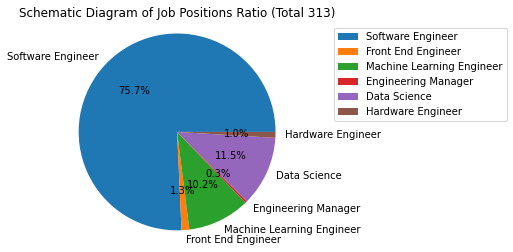

In [256]:
# Generate a pie chart of jobs ratio

jobs = ['Software Engineer','Front End Engineer','Machine Learning Engineer',
        'Engineering Manager', 'Data Science','Hardware Engineer']
numbers_of_job = [ss, fs, mls, managers, dss, hs]
plt.pie(numbers_of_job, labels=jobs, autopct='%1.1f%%')
plt.title('Schematic Diagram of Job Positions Ratio (Total 313)')
plt.axis('equal') 
plt.legend(bbox_to_anchor=(1.0, 0.8, 0.5, 0.2), loc = 'upper right')
plt.savefig('./figures/JobRatio.png', bbox_inches='tight')

In [257]:
def getMean(column):
    count = (column != 0).sum()
    column_sum = column.sum()
    mean = column_sum / count
    
    return mean

In [258]:
# How many Education types 

salaryInfo['Education'].unique()

array(['MS', 'PHD', 'BS'], dtype=object)

In [259]:
# catagories of different Education background

ms = salaryInfo[salaryInfo['Education']=="MS"]
phd = salaryInfo[salaryInfo['Education'] == 'PHD']
bs = salaryInfo[salaryInfo['Education'] == 'BS']

In [260]:
# calculate means of Total based on different Education
ms_tmean = ms['Total'].mean()
phd_tmean = phd['Total'].mean()
bs_tmean = bs['Total'].mean()

# calculate means of Base based on different Education
ms_base_mean = ms['Base'].mean()
bs_base_mean = bs['Base'].mean()
phd_base_mean = phd['Base'].mean()


# calculate means of Bonus based on different Education
msb = ms['Bonus'].dropna()
ms_bonus_mean = getMean(msb)

bsb = bs['Bonus'].dropna()
bs_bonus_mean = getMean(bsb)

phdb = phd['Bonus'].dropna()
phd_bonus_mean = getMean(phdb)

print(ms_bonus_mean, bs_bonus_mean, phd_bonus_mean)

# calculate means of Equity based on different Education
mse = ms['Equity'].dropna()
ms_equity_mean = getMean(mse)

bse = bs['Equity'].dropna()
bs_equity_mean = getMean(bse)

phde = phd['Equity'].dropna()
phd_equity_mean = getMean(phde)

print(ms_equity_mean, bs_equity_mean, phd_equity_mean)

# calculate means of Sign-on based on different Education
msso = ms["Sign-on"].dropna()
ms_signon_mean = getMean(msso)

bsso = bs["Sign-on"].dropna()
bs_signon_mean = getMean(bsso)

phdso = phd["Sign-on"].dropna()
phd_signon_mean = getMean(phdso)

print(ms_signon_mean, bs_signon_mean, phd_signon_mean)

22121.75572519084 17406.78947368421 26267.1875
79280.36094674557 66571.48936170213 96248.67441860466
36129.275 31397.219512195123 68591.42857142857


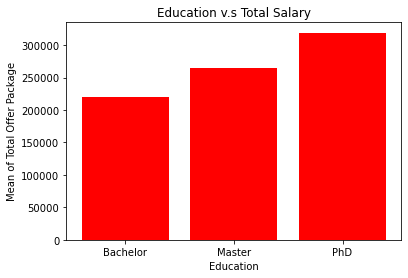

In [261]:
# Getting bar chart of total means of different education backgrounds 

means = [bs_tmean, ms_tmean, phd_tmean]
educations = ['Bachelor', 'Master', 'PhD']
fig = plt.figure()
plt.bar(educations, means, color = 'r')
plt.title('Education v.s Total Salary')
plt.xlabel('Education')
plt.ylabel('Mean of Total Offer Package')
fig.savefig('./figures/EducationSalary1.png', bbox_inches='tight')

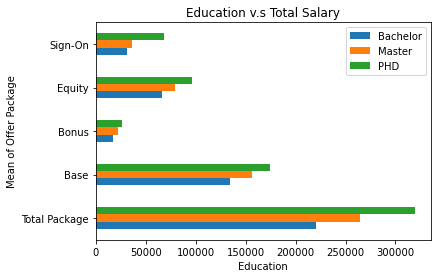

In [262]:
# Getting bar chart of every catagories' means of different education backgrounds 
#print(phd_tmean, phd_base_mean, phd_bonus_mean, phd_equity_mean, phd_signon_mean)

df = pd.DataFrame()
df['Bachelor'] =[bs_tmean, bs_base_mean, bs_bonus_mean, bs_equity_mean, bs_signon_mean]
df['Master'] = [ms_tmean, ms_base_mean, ms_bonus_mean, ms_equity_mean, ms_signon_mean]
df['PHD'] = [phd_tmean, phd_base_mean, phd_bonus_mean, phd_equity_mean, phd_signon_mean]

ind = np.arange(5)
df.plot(kind = 'barh')
plt.title('Education v.s Total Salary')
plt.xlabel('Education')
plt.ylabel('Mean of Offer Package')
plt.yticks(ind, ('Total Package', 'Base', 'Bonus', 'Equity', 'Sign-On'))
plt.savefig('./figures/EducationSalary2.png', bbox_inches='tight')

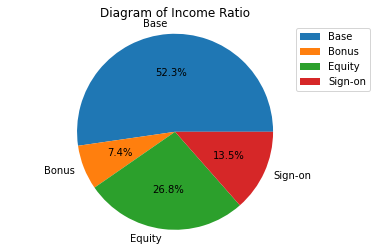

In [265]:
# The composition of income
# Expected to be a pie chart: Base, Equality(3 or 4 years), bonus, sign-on

allbase = salaryInfo["Base"].dropna()
allbase_mean = getMean(allbase)

allbonus = salaryInfo["Bonus"].dropna()
allbonus_mean = getMean(allbonus)

allequity = salaryInfo["Equity"].dropna()
allequity_mean = getMean(allequity)

allsignon = salaryInfo["Sign-on"].dropna()
allsignon_mean = getMean(allsignon)

income = ['Base', 'Bonus', 'Equity', 'Sign-on']
mean_each = [allbase_mean, allbonus_mean, allequity_mean, allsignon_mean]
plt.pie(mean_each, labels=income, autopct='%1.1f%%')
plt.title('Diagram of Income Ratio')
plt.axis('equal') 
plt.legend(bbox_to_anchor=(0.6, 0.8, 0.5, 0.2), loc = 'upper right')
plt.savefig('./figures/IncomeRatio.png', bbox_inches='tight')

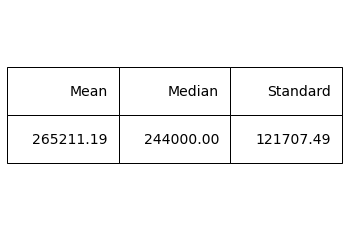

In [284]:
# The mean/median/std of total income.
# Expected to be a table

tmean = format(salaryInfo["Total"].mean(), '.2f')
tmedian = format(salaryInfo["Total"].median(), '.2f')
tstd = format(salaryInfo["Total"].std(), '.2f')

# Generate table
#define figure and axes
fig, ax = plt.subplots()
#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#create data
table_data=[['Mean','Median','Standard'],[tmean, tmedian, tstd]]

table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')
plt.savefig('./figures/MeanMedianStd.png', bbox_inches='tight')

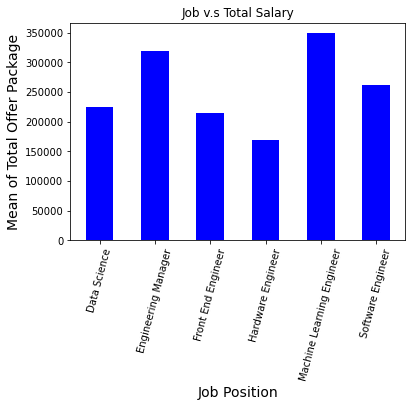

In [317]:
# Job comparison chart
# Jobs included: Mean of Software Engineer, mean of Data Scientist, mean of Machine Learning.

jobs = ['Data Science', 'Engineering Manager', 'Front End Engineer', 'Hardware Engineer',
       'Machine Learning Engineer', 'Software Engineer']
average = salaryInfo.groupby('Job').Total.mean()

fig = plt.figure()
plt.bar(jobs, height = average, color = 'b', width = 0.5)
plt.title('Job v.s Total Salary')
plt.xlabel('Job Position', fontsize=14)
plt.xticks(rotation=75)
plt.ylabel('Mean of Total Offer Package', fontsize=14)
fig.savefig('./figures/JobSalary.png', bbox_inches='tight')
